<div style="color: #2098d1; font-weight: bold; font-size: 1.2em;">This notebook contains the implementation and analysis of three sorting algorithms:</div>
<ol>
    <li><span style="color: #4CAF50; font-weight: bold;">Insertion Sort</span></li>
    <li><span style="color: #FFC107; font-weight: bold;">Merge Sort</span></li>
    <li><span style="color: #F44336; font-weight: bold;">Quick Sort</span></li>
</ol>

We'll analyze their time complexity in best, worst, and average cases and compare their performance with different input types and sizes.

In [9]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from typing import List

### **1. Insertion Sort**

In [ ]:
def insertion_sort(arr: List[int]) -> List[int]:
    arr = arr.copy()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [77]:
def measure_sorting_time(sort_func, arr: List[int]) -> float:
    start_time = time.time()
    sort_func(arr)
    return time.time() - start_time

test_sizes = [100, 500, 1000]
for size in test_sizes:
    random_arr = [random.randint(0, 10000) for _ in range(size)]
    sorted_arr = list(range(size))
    reversed_arr = list(range(size, 0, -1))

    print(f"\nSize: {size}")
    print("Random:", measure_sorting_time(insertion_sort, random_arr))
    print("Sorted:", measure_sorting_time(insertion_sort, sorted_arr))
    print("Reversed:", measure_sorting_time(insertion_sort, reversed_arr))


Size: 100
Random: 0.005509138107299805
Sorted: 0.0
Reversed: 0.0

Size: 500
Random: 0.017384052276611328
Sorted: 0.0
Reversed: 0.02535700798034668

Size: 1000
Random: 0.05379509925842285
Sorted: 0.0015249252319335938
Reversed: 0.08157730102539062


### **2. Merge Sort**

In [80]:
def merge_sort(arr: List[int]) -> List[int]:
    arr = arr.copy()
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left: List[int], right: List[int]) -> List[int]:
    result, i, j = [], 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

In [82]:
for size in test_sizes:
    random_arr = [random.randint(0, 10000) for _ in range(size)]
    sorted_arr = list(range(size))
    reversed_arr = list(range(size, 0, -1))

    print(f"\nSize: {size}")
    print("Random:", measure_sorting_time(merge_sort, random_arr))
    print("Sorted:", measure_sorting_time(merge_sort, sorted_arr))
    print("Reversed:", measure_sorting_time(merge_sort, reversed_arr))


Size: 100
Random: 0.0
Sorted: 0.0
Reversed: 0.001439809799194336

Size: 500
Random: 0.0020017623901367188
Sorted: 0.001003265380859375
Reversed: 0.0009257793426513672

Size: 1000
Random: 0.004587411880493164
Sorted: 0.002590656280517578
Reversed: 0.001981496810913086


### **3. Quick Sort**

In [85]:
def quick_sort(arr: List[int]) -> List[int]:
    arr = arr.copy()
    quick_sort_helper(arr, 0, len(arr) - 1)
    return arr

def quick_sort_helper(arr: List[int], low: int, high: int) -> None:
    if low < high:
        pi = partition(arr, low, high)
        quick_sort_helper(arr, low, pi - 1)
        quick_sort_helper(arr, pi + 1, high)

def partition(arr: List[int], low: int, high: int) -> int:
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

In [87]:
for size in test_sizes:
    random_arr = [random.randint(0, 10000) for _ in range(size)]
    sorted_arr = list(range(size))
    reversed_arr = list(range(size, 0, -1))

    print(f"\nSize: {size}")
    print("Random:", measure_sorting_time(quick_sort, random_arr))
    print("Sorted:", measure_sorting_time(quick_sort, sorted_arr))
    print("Reversed:", measure_sorting_time(quick_sort, reversed_arr))


Size: 100
Random: 0.0
Sorted: 0.0009980201721191406
Reversed: 0.0

Size: 500
Random: 0.0
Sorted: 0.019754409790039062
Reversed: 0.023958444595336914

Size: 1000
Random: 0.002811908721923828
Sorted: 0.1119394302368164
Reversed: 0.09041357040405273


### **Comparison**

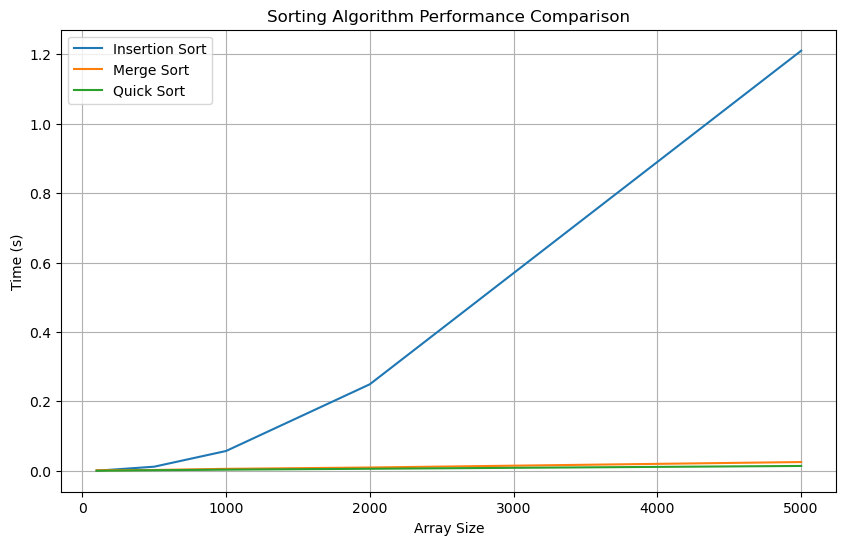

In [90]:
def run_and_collect_times():
    sizes = [100, 500, 1000, 2000, 5000]
    results = {
        'Insertion Sort': [],
        'Merge Sort': [],
        'Quick Sort': []
    }

    for size in sizes:
        arr = [random.randint(0, 10000) for _ in range(size)]
        results['Insertion Sort'].append(measure_sorting_time(insertion_sort, arr))
        results['Merge Sort'].append(measure_sorting_time(merge_sort, arr))
        results['Quick Sort'].append(measure_sorting_time(quick_sort, arr))

    return sizes, results

sizes, results = run_and_collect_times()

# Plot
plt.figure(figsize=(10, 6))
for algo, times in results.items():
    plt.plot(sizes, times, label=algo)
plt.xlabel("Array Size")
plt.ylabel("Time (s)")
plt.title("Sorting Algorithm Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Additional Visualizations and Their Purpose

1. **Box Plot**  
   Shows variability and consistency in sorting times across multiple runs. Helps identify outliers and stability of each algorithm.

2. **Heatmap**  
   Highlights performance differences across array sizes and types (random, sorted, reversed). Useful for spotting algorithm strengths and weaknesses under different input conditions.

3. **Log-Scale Line Chart**  
   Reveals time complexity trends clearly as input size increases. Helps differentiate growth rates (e.g., O(n²) vs O(n log n)) visually.


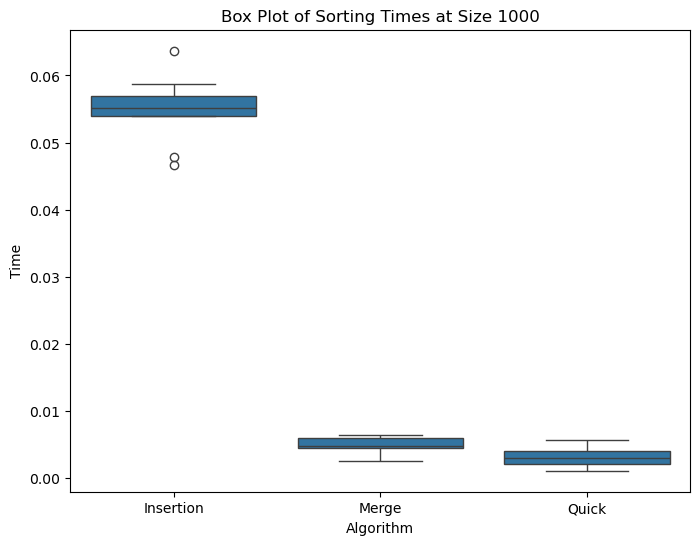

In [93]:
import seaborn as sns
import pandas as pd

def collect_multiple_runs():
    data = []
    sizes = [1000]
    for _ in range(10):  
        for algo_name, algo_func in [("Insertion", insertion_sort), ("Merge", merge_sort), ("Quick", quick_sort)]:
            arr = [random.randint(0, 10000) for _ in range(sizes[0])]
            time_taken = measure_sorting_time(algo_func, arr)
            data.append({"Algorithm": algo_name, "Time": time_taken})
    return pd.DataFrame(data)

df = collect_multiple_runs()
plt.figure(figsize=(8,6))
sns.boxplot(x="Algorithm", y="Time", data=df)
plt.title("Box Plot of Sorting Times at Size 1000")
plt.show()

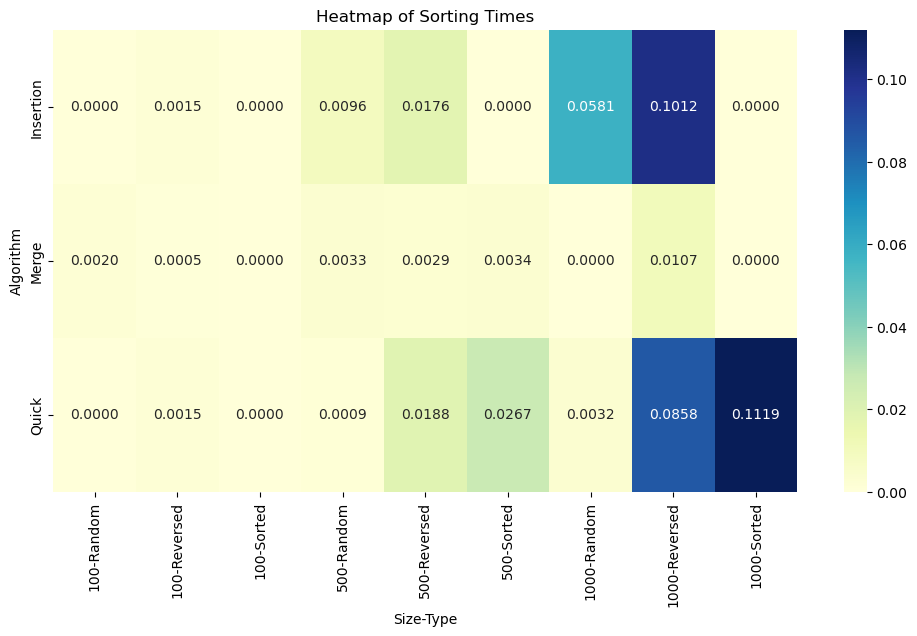

In [95]:
def collect_heatmap_data():
    types = ["Random", "Sorted", "Reversed"]
    sizes = [100, 500, 1000]
    algorithms = [("Insertion", insertion_sort), ("Merge", merge_sort), ("Quick", quick_sort)]
    data = []

    for algo_name, algo_func in algorithms:
        for size in sizes:
            for dtype in types:
                if dtype == "Random":
                    arr = [random.randint(0, 10000) for _ in range(size)]
                elif dtype == "Sorted":
                    arr = list(range(size))
                else:
                    arr = list(range(size, 0, -1))
                time_taken = measure_sorting_time(algo_func, arr)
                data.append({
                    "Algorithm": algo_name,
                    "Size": size,
                    "Type": dtype,
                    "Time": time_taken
                })
    return pd.DataFrame(data)

heat_df = collect_heatmap_data()
pivot_table = heat_df.pivot_table(index="Algorithm", columns=["Size", "Type"], values="Time")
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Heatmap of Sorting Times")
plt.show()


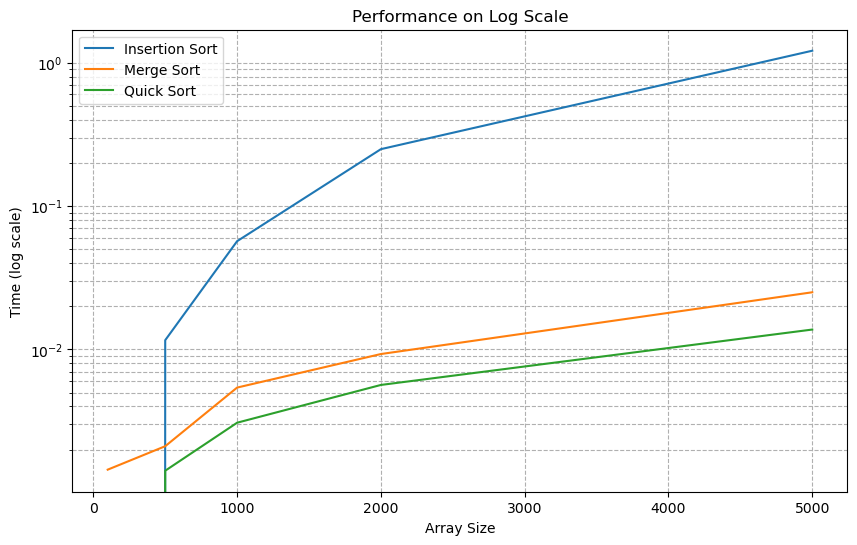

In [97]:
plt.figure(figsize=(10, 6))
for algo, times in results.items():
    plt.plot(sizes, times, label=algo)
plt.xlabel("Array Size")
plt.ylabel("Time (log scale)")
plt.yscale("log")
plt.title("Performance on Log Scale")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

## Stability and Space Analysis

Understanding the properties of each sorting algorithm helps in selecting the right one for different scenarios.

### Algorithm Properties Table

| Algorithm      | Stable | In-Place | Type               |
|----------------|--------|----------|--------------------|
| Quick Sort     | ❌     | ✅       | Divide and Conquer |
| Merge Sort     | ✅     | ❌       | Divide and Conquer |
| Insertion Sort | ✅     | ✅       | Incremental        |

### Benefits of Each Property

- **Stable**  
  Preserves the relative order of equal elements. Useful when sorting data with multiple keys (e.g., by name and then by date).
  
- **In-Place**  
  Uses minimal extra space (constant memory). Efficient for systems with memory constraints.
  
- **Type**  
  - *Divide and Conquer*: Efficient for large datasets; splits problem recursively (used in Quick and Merge Sort).  
  - *Incremental*: Builds the sorted array step by step (used in Insertion Sort); good for small or nearly sorted arrays.
